In [4]:
%matplotlib inline
from preamble import *

ModuleNotFoundError: No module named 'preamble'

X.shape: (26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


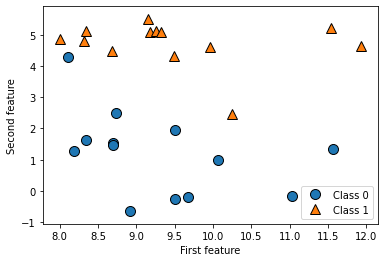

In [3]:
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.47411033  1.53708251  0.86893293  1.87664889
  0.0945257  -1.41502356  0.25438895  0.09398858]


Text(0, 0.5, 'Target')

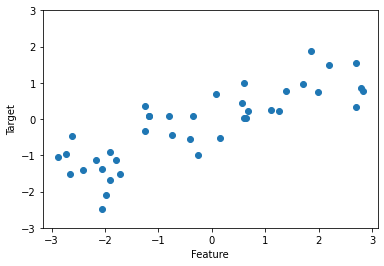

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print(y)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [19]:
import pandas as pd
data = pd.read_csv('C:/Users/ASIA-I627/Downloads/Prostate_Cancer.csv');
print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()
data.head()


 	 The data frame has 100 rows and 10 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [20]:
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diagnosis_result  100 non-null    object 
 1   radius            100 non-null    int64  
 2   texture           100 non-null    int64  
 3   perimeter         100 non-null    int64  
 4   area              100 non-null    int64  
 5   smoothness        100 non-null    float64
 6   compactness       100 non-null    float64
 7   symmetry          100 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 6.4+ KB


In [21]:
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry
0,M,23,12,151,954,0.143,0.278,0.242
1,B,9,13,133,1326,0.143,0.079,0.181
2,M,21,27,130,1203,0.125,0.160,0.207
3,M,14,16,78,386,0.070,0.284,0.260
4,M,9,19,135,1297,0.141,0.133,0.181


In [22]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis_result'].value_counts())

In [24]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis_result'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 100 diagnosis, 62 malignant and 38 benign.


In [30]:
features_mean= list(data.columns[1:7])

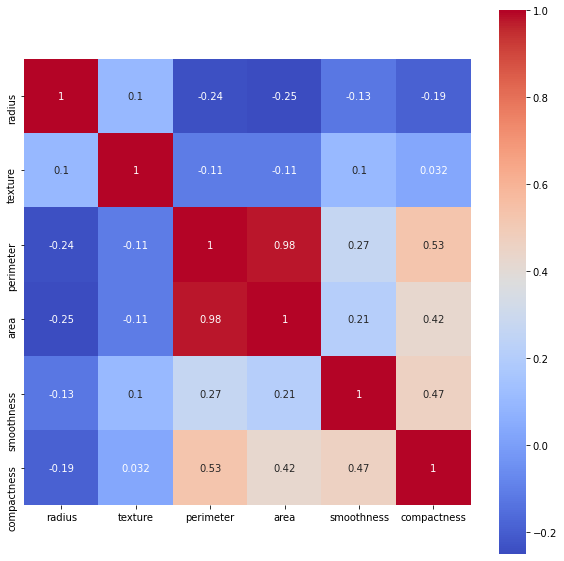

In [31]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

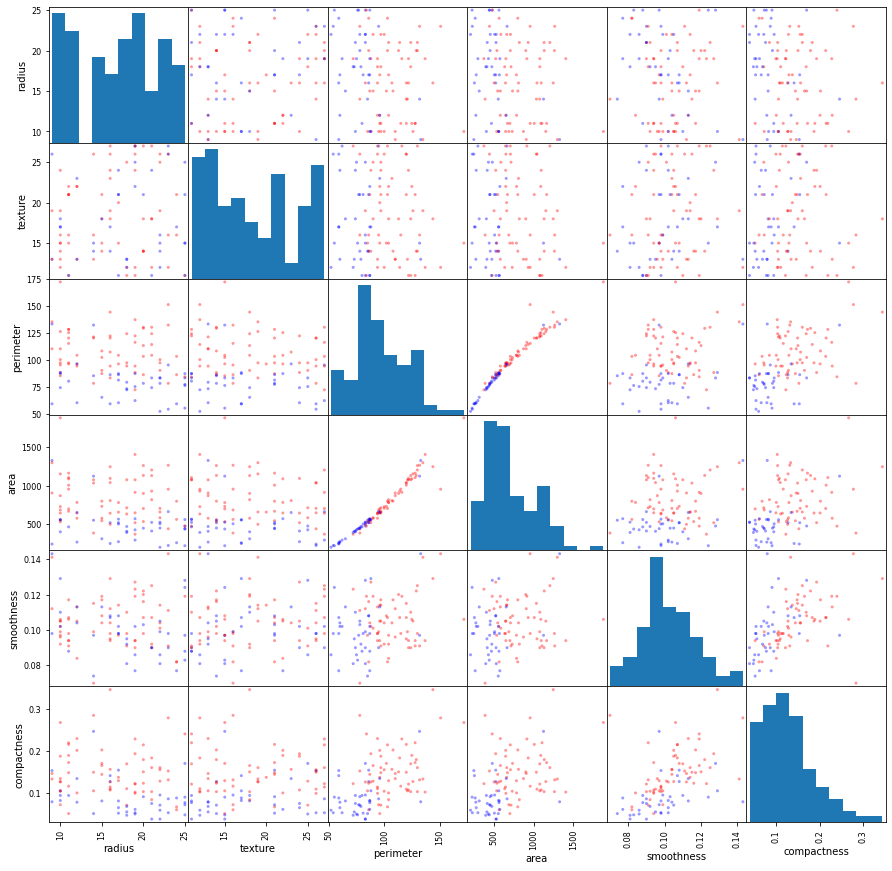

In [32]:
color_dic = {'M':'red', 'B':'blue'}
colors = data['diagnosis_result'].map(lambda x: color_dic.get(x))

sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

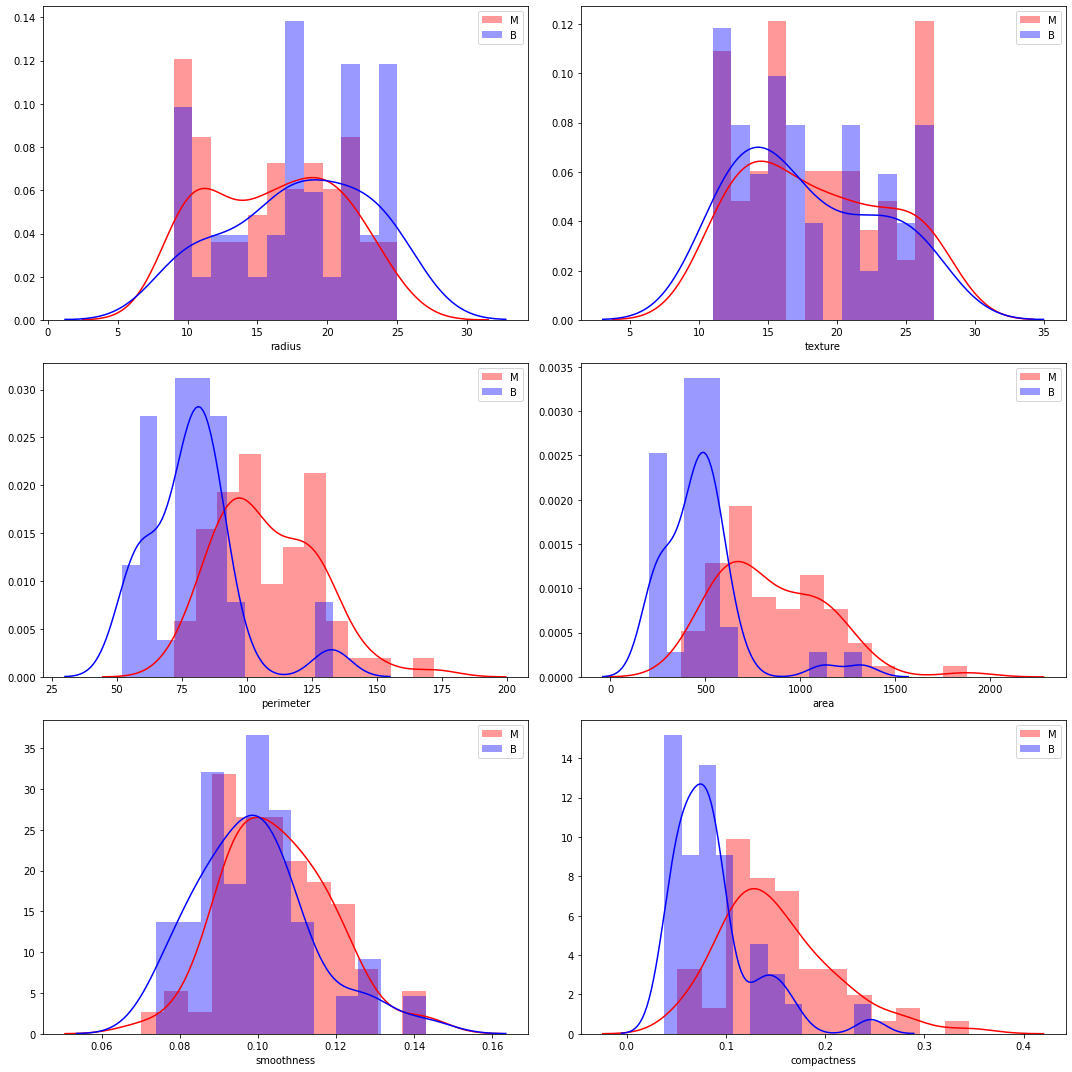

In [34]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis_result']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis_result']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

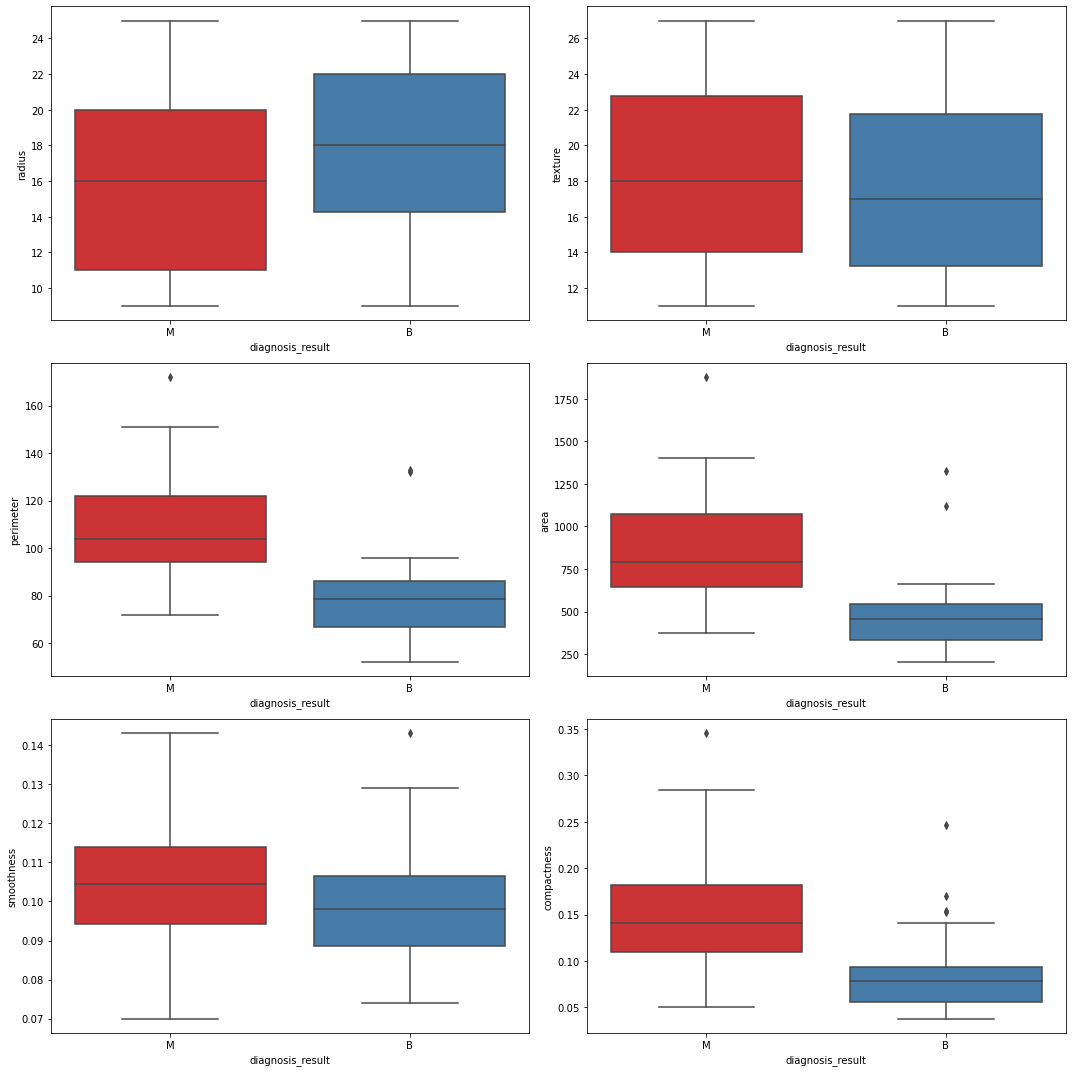

In [35]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis_result', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()